In [58]:
#
#  Always start by importing the relvant libraries 
#

#import os                        # import the interface with the operating system (not needed now)
#import numpy as np               # import numpy (also not used)
import pandas as pd              # Pandas library for data frames
import matplotlib.pyplot as plt   # impport 'pyplot' part of the matplotlib, to generate files.


# Reading table files with PANDAS (tutorial)


Pandas has several methods for readign different types of files. Here, we look at the three cases for reading data in table format from files with different fromats. Inside the folder '*Data_Pandas_examples*' there are three files containign exactly the same data but formatted as follows:

The **coma-separated values** format (**.csv**), simply lists the rows using comas for separating data (this is read by excel, for example). Here we have 1 columnb header:  
```bash
X,     Y1,      Y2,      Y3,      Y4,      Y5   
0.008958, 8.0248e-05, 2.6626e-08, 0.99552, 1.4736, 0.50216
0.07248, 0.0052438, 1.4101e-05, 0.96376, 1.3101, 0.51288
0.09954, 0.0098755, 3.6528e-05, 0.95023, 1.251, 0.51501
0.1133, 0.012788, 5.3903e-05, 0.94334, 1.2228, 0.51554
0.1232, 0.01509, 6.9181e-05, 0.93842, 1.2036, 0.5157
 ....
```

$$
~
$$

**Fixed-width** files have all the column formatted and make of the same length. One needs to tell Pandas the size do each column, so that it can read it:   
```bash
  Example of a fixed-width-format file

  The data is formatted in 6 columns of size 8,14,14,14,14,14

   X           Y1            Y2            Y3            Y4            Y5 
0.00895    8.0248e-05    2.6626e-08       0.99552        1.4736       0.50216
0.07248     0.0052438    1.4101e-05       0.96376        1.3101       0.51288
0.09954     0.0098755    3.6528e-05       0.95023         1.251       0.51501
 0.1133      0.012788    5.3903e-05       0.94334        1.2228       0.51554
 0.1232       0.01509    6.9181e-05       0.93842        1.2036        0.5157
 0.1655      0.027136    0.00016785       0.91726         1.127       0.51424
 .....
```

$$
~
$$

In a general unvormatted files, data can be setapared by spaces or other charactes and of different length. the method for reading general (unformatted) data files is **pandas.DataFrame.read_table()**. One needs to tell Pandas which characters are used for separations. For example: comas (sep=','), dash symbols (sep='#) or spaces (sep=' ' or sep='\s'). sep='\s+' it means it can ber any number (one or more) of spaces.  
```bash

  Example of a date file in genera format.
  Data is in 6 columns separated by spaces of different size

   X        Y1        Y2        Y3        Y4     Y5   
0.008958    8.0248e-05   2.6626e-08 0.99552   1.4736 0.50216
0.07248    0.0052438   1.4101e-05 0.96376   1.3101 0.51288
0.09954    0.0098755   3.6528e-05 0.95023   1.251 0.51501
0.1133    0.012788   5.3903e-05 0.94334   1.2228 0.51554
0.1232    0.01509   6.9181e-05 0.93842   1.2036 0.5157
 .....
```


We will read columns 2 and 6 from file '*TableFile.csv*' rexpectively using the **read_csv()** and **read_table()** methods, columns 3 and 5 from '*TableFile_FxdWdt.csv*' in using **read_fwf()**, and 4 form '*TableFile.dat*' using the **read_table()**.

In [63]:
import pandas as pd 

#
#  CSV file:
#

# Read the data as csv file and organize the data into two arrays with X and Y1 values.
# In this case the PANDAS knows that it is a csv file, so no need to tell what is the separator
Table_from_csv = pd.read_csv("Data_Pandas_examples/TableFile.csv", usecols=(0,1), names=('X value', 'Y1 value'), header=0)

# Here we are reading a .csv but the read_table() methods does not makes assumptions, so we must tell the separators are comas: sep=','
Table_from_csv2 = pd.read_table("Data_Pandas_examples/TableFile.csv", usecols=(0,5), names=('X value', 'Y5 value'), sep=',',header=0)

print("\nThe data read from the cvs file is:\n\n         X value   Y1 value    Y5 value")
for i in range(len(Table_from_csv['X value'])):
    if i<5 or i+5>len(Table_from_csv['X value']):
        print(" %3i  %10f %10f  %10f  " % (i,Table_from_csv['X value'][i],Table_from_csv['Y1 value'][i],Table_from_csv2['Y5 value'][i]) )
    else:
        if i==5: print("  ...  ....")
    
# ----


#
# Fixed width file
#

# This is a different option the file: instead of passing a filename, we open the file ourselves and later close it.
infile = open("Data_Pandas_examples/TableFile_FxdWdt.dat",'r')  # Open fixed width file

# Here we do not need to worry about the separation characters, but we MUST tell what are width of each column.
Table_from_fwf = pd.read_fwf(infile, usecols=(0,2,4), widths=(8,14,14,14,14,14), names=('X value', 'Y2 value', 'Y4 value'), header=2)

infile.close

print("\nThe data read from the fixed width file is:\n")
print(Table_from_fwf)

# ----


#
# General (unformatted) file
#

# We go back to let Pandas do the opening/closing of the file:

#  sep is the separator: '\s' is the space character, '+' means it can be one or more spaces  (if one says sep='\s' ir will not work in this case!)  
Table_from_raw = pd.read_table("Data_Pandas_examples/TableFile.dat", usecols=(0,3),  names=('X value', 'Y3 value'), sep='\s+',header=2)

print("\nThe data read from the raw file is:\n")
print(Table_from_raw)



The data read from the cvs file is:

         X value   Y1 value    Y5 value
   0    0.003455   0.000012    0.500850  
   1    0.056800   0.003223    0.510980  
   2    0.088300   0.007776    0.514300  
   3    0.116100   0.013408    0.515610  
   4    0.160900   0.025663    0.514560  
  ...  ....
  96    2.874000   0.070124    1.148300  
  97    2.882000   0.066099    1.154300  
  98    2.921000   0.047922    1.182300  
  99    2.931000   0.043509    1.189400  

The data read from the fixed width file is:

     X value      Y2 value  Y4 value
0   0.003455  1.527200e-09   1.48970
1   0.056800  6.786200e-06   1.34700
2   0.088300  2.549600e-05   1.27490
3   0.116100  5.789300e-05   1.21740
4   0.160900  1.542500e-04   1.13480
..       ...           ...       ...
95  2.852000  8.591100e-01   0.22375
96  2.874000  8.788400e-01   0.22232
97  2.882000  8.861900e-01   0.22179
98  2.921000  9.229600e-01   0.21924
99  2.931000  9.330200e-01   0.21857

[100 rows x 3 columns]

The data read fro

As one can see, all columns have printed printed out and they were all read correctly. Arrays for aech set data can be access using syntax **object_name[Label]**.  For all four objects (*Table_from_csv*, *Table_from_csv2*, *Table_from_fwf* and  *Table_from_raw*) we have decided to load the set of X values, so we have actually four copies of it. This wasn't need (but not forbidden either).

One could now use these arrays to generate a plot, as in the following cell.

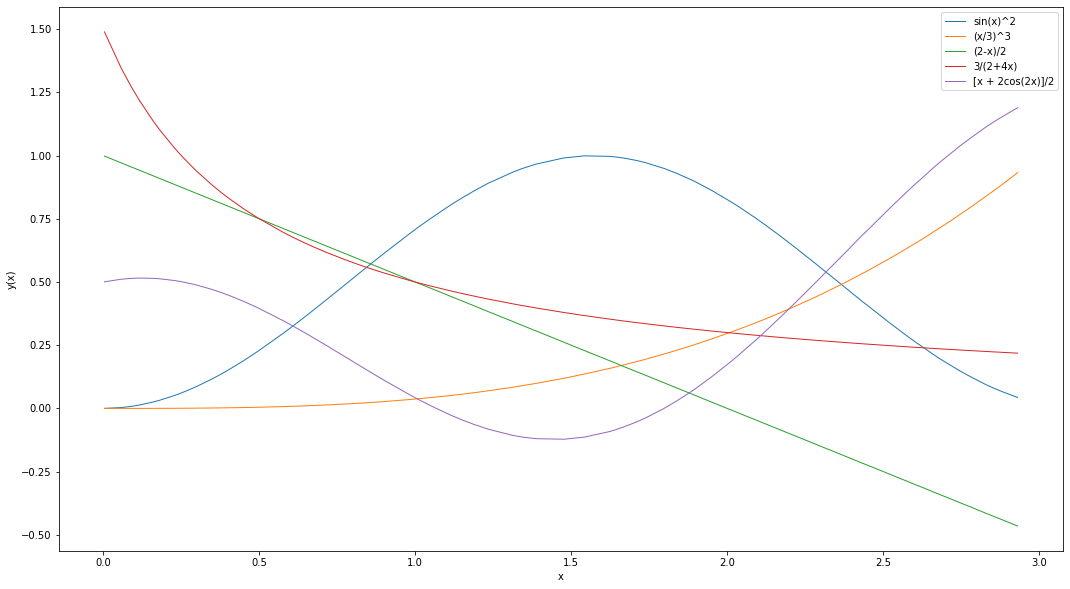

In [62]:
import matplotlib.pyplot as plt   # re-import it (in case not done above)

fig, ax = plt.subplots(figsize=(18,10))
ax.set_xlabel(r'x')
ax.set_ylabel(r'y(x)')

ax.plot(Table_from_csv['X value'],  Table_from_csv['Y1 value'],  alpha=1, lw=1, label='sin(x)^2')
ax.plot(Table_from_fwf['X value'],  Table_from_fwf['Y2 value'],  alpha=1, lw=1, label='(x/3)^3')
ax.plot(Table_from_raw['X value'],  Table_from_raw['Y3 value'],  alpha=1, lw=1, label='(2-x)/2')
ax.plot(Table_from_fwf['X value'],  Table_from_fwf['Y4 value'],  alpha=1, lw=1, label='3/(2+4x)')
ax.plot(Table_from_csv2['X value'], Table_from_csv2['Y5 value'], alpha=1,lw=1, label='[x + 2cos(2x)]/2')

ax.legend()
plt.show()